# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:

    if not (isinstance(A, np.ndarray) and isinstance(x, np.ndarray) and isinstance(b, np.ndarray)):
        return None
    if A.ndim != 2 or x.ndim != 1 or b.ndim != 1:
        return None
    if A.shape[0] != b.shape[0] or A.shape[1] != x.shape[0]:
        return None
    
    r = b - A @ x
    return np.linalg.norm(r)

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [3]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    """Funkcja tworząca zestaw składający się z macierzy A (m,n) i
    wektora b (m,) na podstawie pomocniczego wektora t (m,).

    Args:
        m (int): Liczba wierszy macierzy A.
        n (int): Liczba kolumn macierzy A.

    Returns:
        (tuple[np.ndarray, np.ndarray]):
            - Macierz A o rozmiarze (m,n),
            - Wektor b (m,).
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if not (isinstance(m, int) and isinstance(n, int)) or m <= 0 or n <= 0:
        return None

    
    t = np.linspace(0, 1, m)
    b = np.cos(4*t)
    A = np.vander(t, n, increasing=True)

    return (A, b)

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [ ]:
time_solve = []
mem_solve = []
norm_solve = []

def square_from_rectan(
    A: np.ndarray, b: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:

    if not (isinstance(A, np.ndarray) and isinstance(b, np.ndarray)):
        return None
    if A.ndim != 2 or b.ndim != 1:
        return None
    if A.shape[0] != b.shape[0]:
        return None

    A_new = np.transpose(A) @ A
    b_new = np.transpose(A) @ b
    return (A_new, b_new)

def solve_svd(A, b):
    U, sigma, V = np.linalg.svd(A, False) 
    sigma = np.diag(sigma)
    return V.T @ np.linalg.solve(sigma, U.T @ b)


A, b = spare_matrix_Abt(50, 12)
A_new, b_new = square_from_rectan(A, b)

saved_timing_1 = %timeit -r 5 -n 10 -o np.linalg.solve(A_new, b_new)
time_solve.append(saved_timing_1.average)
mem_temp_1 = %memit -o np.linalg.solve(A_sq, b_sq)
mem_solve.append(mem_temp_1)

x1 = np.linalg.solve(A_new, b_new)
norm_solve.append(residual_norm(A, x1, b))


saved_timing_2 = %timeit -r 5 -n 10 -o np.linalg.lstsq(A, b)[0]
time_solve.append(saved_timing_2.average)
mem_temp_2 = %memit -o np.linalg.lstsq(A, b)[0]
mem_solve.append(mem_temp_2)

x2 = np.linalg.lstsq(A, b)[0]
norm_solve.append(residual_norm(A, x2, b))


Q, R = np.linalg.qr(A)
b_q = Q.T @ b

saved_timing_3 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(R, b_q)
time_solve.append(saved_timing_3.average)
mem_temp_3 = %memit -o sp.linalg.solve_triangular(R, b_q)
mem_solve.append(mem_temp_3)

x3 = sp.linalg.solve_triangular(R, b_q)
norm_solve.append(residual_norm(A, x3, b))


saved_timing_4 = %timeit -r 5 -n 10 -o solve_svd(A, b)
time_solve.append(saved_timing_4.average)
mem_temp_4 = %memit -o solve_svd(A, b)
mem_solve.append(mem_temp_4)

x4 = solve_svd(A, b)
norm_solve.append(residual_norm(A, x4, b))


wyniki = [x1, x2, x3, x4]
for i, j in enumerate(wyniki):
    print(f'Dla metody: {i+1} wynik wynosi: {j}')

10.9 μs ± 2.34 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [ ]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  8.679e-08
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  15.64 μs ± 4.465 μs per loop 
Druga metoda    :  35.55 μs ± 4.073 μs per loop 
Trzecia metoda  :  28.63 μs ± 7.677 μs per loop 
Czwarta metoda  :  47.89 μs ± 6.177 μs per loop 

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 124.59 MiB, increment: 0.00 MiB
Druga metoda    :  peak memory: 124.59 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 139.42 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 140.44 MiB, increment: 0.00 MiB


--- ZADANIE 3 ---


### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [4]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

In [5]:
A = np.column_stack([d, np.ones_like(d)])


wspolczynniki, blad_kwadratowy, _, _ = np.linalg.lstsq(A, w, rcond=None)

m, c = wspolczynniki
suma_bledow = blad_kwadratowy[0]


print(f"Model: w = {m:.4f} * d + {c:.4f} | Błąd kwadratowy: {suma_bledow:.4f}")

Model: w = 0.7861 * d + -3.5036 | Błąd kwadratowy: 3405.1374


---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

--- Punkt 1: Symulacja danych pomiarowych ---
--------------------------------------------------

--- Punkt 2: Modelowanie procesu ---

### Model 1: y_hat ~ a + x1 ###
3. Wyznaczone współczynniki b1 = [2.08484357 1.29947668]

### Model 2: y_hat ~ a + x2 ###
3. Wyznaczone współczynniki b2 = [ 1.96487636 -0.67156217]

### Model 3: y_hat ~ a + x1 + x2 ###
3. Wyznaczone współczynniki b3 = [ 2.08864867  1.22608936 -0.51227678]

### Model 4: y_hat ~ a + x1 + x2 + x1*x2 ###
3. Wyznaczone współczynniki b4 = [ 2.08231097  1.24887828 -0.53093472 -0.07645649]

--------------------------------------------------
### Analiza metryk i wyników ###

--- Porównanie współczynników ---
          |   b0 (a) |  b1 (x1) |  b2 (x2) | b3 (x1x2)
----------|----------|----------|----------|----------
Rzeczywiste |   2.0000 |   1.0000 |  -0.5000 |   0.0000
Model 1   |   2.0848 |   1.2995 |        - |        -
Model 2   |   1.9649 |        - |  -0.6716 |        -
Model 3   |   2.0886 |   1.2261 |  -0.5123 |       

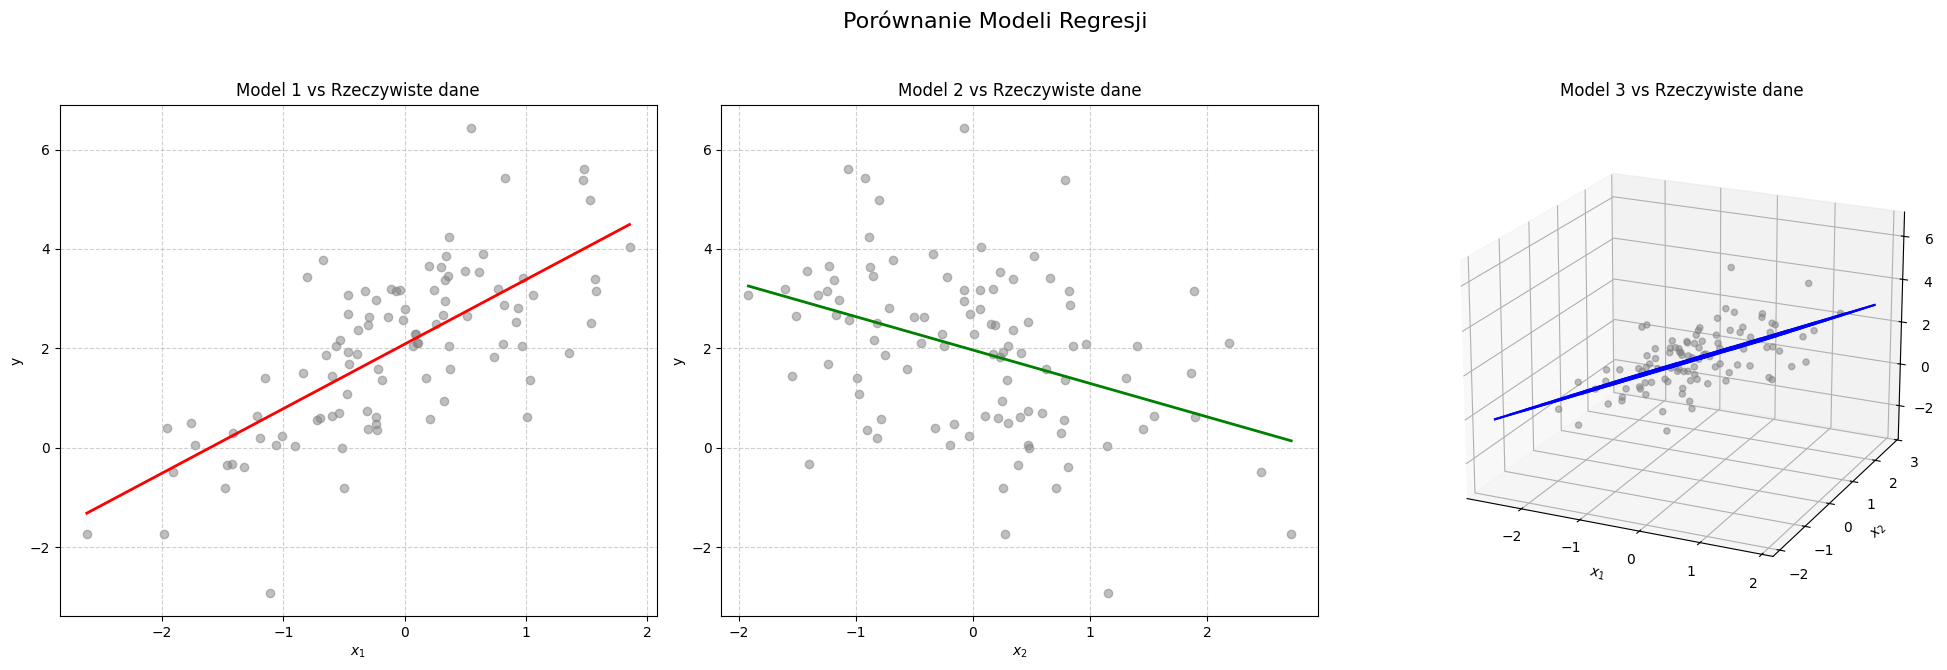

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Ustawienie ziarna dla powtarzalności wyników
np.random.seed(42)

# --- Definicje metryk (zamiast sklearn) ---

def calc_mse(y_true, y_pred):
    """Oblicza błąd średniokwadratowy (MSE)"""
    return np.mean((y_true - y_pred)**2)

def calc_r2(y_true, y_pred):
    """Oblicza współczynnik determinacji R^2"""
    ss_res = np.sum((y_true - y_pred)**2) # Suma kwadratów reszt
    ss_tot = np.sum((y_true - np.mean(y_true))**2) # Całkowita suma kwadratów
    if ss_tot == 0:
        return 1.0 if ss_res == 0 else 0.0
    r2 = 1 - (ss_res / ss_tot)
    return r2

# --- Punkt 1: Symulacja danych pomiarowych ---

print("--- Punkt 1: Symulacja danych pomiarowych ---")
N = 100
x1 = np.random.normal(0, 1, (N, 1))
x2 = np.random.normal(0, 1, (N, 1))
epsilon = np.random.normal(0, 1, (N, 1))
y = 2 + x1 - 0.5 * x2 + epsilon
ones = np.ones((N, 1))
print("-" * 50)

# --- Punkt 2: Modelowanie procesu ---

print("\n--- Punkt 2: Modelowanie procesu ---")

# --- Model 1: y_hat ~ a + x1 ---
print("\n### Model 1: y_hat ~ a + x1 ###")
Z1 = np.concatenate([ones, x1], axis=1)
Q1, R1 = np.linalg.qr(Z1)
rhs1 = Q1.T @ y
b1 = sp.linalg.solve_triangular(R1, rhs1.flatten(), lower=False)
y_hat1 = (Z1 @ b1).reshape(-1, 1)
mse1 = calc_mse(y, y_hat1)
r2_1 = calc_r2(y, y_hat1)
print(f"3. Wyznaczone współczynniki b1 = {b1.flatten()}")

# --- Model 2: y_hat ~ a + x2 ---
print("\n### Model 2: y_hat ~ a + x2 ###")
Z2 = np.concatenate([ones, x2], axis=1)
Q2, R2 = np.linalg.qr(Z2)
rhs2 = Q2.T @ y
b2 = sp.linalg.solve_triangular(R2, rhs2.flatten(), lower=False)
y_hat2 = (Z2 @ b2).reshape(-1, 1)
mse2 = calc_mse(y, y_hat2)
r2_2 = calc_r2(y, y_hat2)
print(f"3. Wyznaczone współczynniki b2 = {b2.flatten()}")

# --- Model 3: y_hat ~ a + x1 + x2 ---
print("\n### Model 3: y_hat ~ a + x1 + x2 ###")
Z3 = np.concatenate([ones, x1, x2], axis=1)
Q3, R3 = np.linalg.qr(Z3)
rhs3 = Q3.T @ y
b3 = sp.linalg.solve_triangular(R3, rhs3.flatten(), lower=False)
y_hat3 = (Z3 @ b3).reshape(-1, 1)
mse3 = calc_mse(y, y_hat3)
r2_3 = calc_r2(y, y_hat3)
print(f"3. Wyznaczone współczynniki b3 = {b3.flatten()}")

# --- Model 4: y_hat ~ a + x1 + x2 + x1*x2 ---
print("\n### Model 4: y_hat ~ a + x1 + x2 + x1*x2 ###")
x1x2 = x1 * x2
Z4 = np.concatenate([ones, x1, x2, x1x2], axis=1)
Q4, R4 = np.linalg.qr(Z4)
rhs4 = Q4.T @ y
b4 = sp.linalg.solve_triangular(R4, rhs4.flatten(), lower=False)
y_hat4 = (Z4 @ b4).reshape(-1, 1)
mse4 = calc_mse(y, y_hat4)
r2_4 = calc_r2(y, y_hat4)
print(f"3. Wyznaczone współczynniki b4 = {b4.flatten()}")


# --- Analiza końcowa i metryki ---
print("\n" + "-" * 50)
print("### Analiza metryk i wyników ###")

print("\n--- Porównanie współczynników ---")
print("          |   b0 (a) |  b1 (x1) |  b2 (x2) | b3 (x1x2)")
print("----------|----------|----------|----------|----------")
print(f"Rzeczywiste |   2.0000 |   1.0000 |  -0.5000 |   0.0000")
print(f"Model 1   | {b1[0]:>8.4f} | {b1[1]:>8.4f} |        - |        -")
print(f"Model 2   | {b2[0]:>8.4f} |        - | {b2[1]:>8.4f} |        -")
print(f"Model 3   | {b3[0]:>8.4f} | {b3[1]:>8.4f} | {b3[2]:>8.4f} |        -")
print(f"Model 4   | {b4[0]:>8.4f} | {b4[1]:>8.4f} | {b4[2]:>8.4f} | {b4[3]:>8.4f}")


print("\n--- Porównanie metryk dopasowania ---")
print("          |      MSE |       R2")
print("----------|----------|----------")
print(f"Model 1   | {mse1:>8.4f} | {r2_1:>8.4f}")
print(f"Model 2   | {mse2:>8.4f} | {r2_2:>8.4f}")
print(f"Model 3   | {mse3:>8.4f} | {r2_3:>8.4f}")
print(f"Model 4   | {mse4:>8.4f} | {r2_4:>8.4f}")


print("\nOpis:")
print(f"Model 3 (a + x1 + x2) uzyskał współczynniki (b0={b3[0]:.4f}, b1={b3[1]:.4f}, b2={b3[2]:.4f})")
print("najbliższe rzeczywistym wartościom (a=2, x1=1, x2=-0.5).")
print(f"Model ten ma również najniższy błąd średniokwadratowy (MSE = {mse3:.4f}) oraz najwyższy")
print(f"współczynnik determinacji (R2 = {r2_3:.4f}), co oznacza, że najlepiej odwzorowuje")
print("rzeczywisty proces, z którego pochodzą dane.")


# --- Wykresy (Punkt 2, podpunkt 4) ---

fig = plt.figure(figsize=(20, 7))
plt.suptitle('Porównanie Modeli Regresji', fontsize=16)

# Model 1: y_hat ~ a + x1
ax1 = fig.add_subplot(131)
ax1.scatter(x1, y, label='Rzeczywiste y', alpha=0.5, c='gray')
sort_indices_1 = np.argsort(x1.flatten())
ax1.plot(x1[sort_indices_1], y_hat1[sort_indices_1], color='red', linewidth=2, label=f'Model 1: $\hat{y} = {b1[0]:.2f} + {b1[1]:.2f} x_1$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('y')
ax1.set_title('Model 1 vs Rzeczywiste dane')
ax1.grid(True, linestyle='--', alpha=0.6)

# Model 2: y_hat ~ a + x2
ax2 = fig.add_subplot(132)
ax2.scatter(x2, y, label='Rzeczywiste y', alpha=0.5, c='gray')
sort_indices_2 = np.argsort(x2.flatten())
ax2.plot(x2[sort_indices_2], y_hat2[sort_indices_2], color='green', linewidth=2, label=f'Model 2: $\hat{y} = {b2[0]:.2f} + {b2[1]:.2f} x_2$')
ax2.set_xlabel('$x_2$')
ax2.set_ylabel('y')
ax2.set_title('Model 2 vs Rzeczywiste dane')
ax2.grid(True, linestyle='--', alpha=0.6)

# Model 3: y_hat ~ a + x1 + x2 (Płaszczyzna regresji)
ax3 = fig.add_subplot(133, projection='3d')

plot_x1, plot_x2 = np.meshgrid(
    np.linspace(np.min(x1), np.max(x1), 10),
    np.linspace(np.min(x2), np.max(x2), 10)
)
plot_y = b3[0] + b3[1] * plot_x1 + b3[2] * plot_x2

ax3.scatter(x1, x2, y, label='Rzeczywiste y', alpha=0.5, c='gray')
ax3.plot_wireframe(plot_x1, plot_x2, plot_y, color='blue', label='Model 3 (Płaszczyzna regresji)')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('y')
ax3.set_title('Model 3 vs Rzeczywiste dane')
ax3.view_init(elev=20, azim=-65)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)